In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles
from matplotlib import ticker

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Read all experiments exported data

In [3]:
coss_master_table = pd.read_csv('data/coss_master_table.csv', sep='\t', lineterminator='\r')
msfragger_std_master_table = pd.read_csv('data/msfragger_std_master_table.csv', sep='\t', lineterminator='\r')
msfragger_open_master_table = pd.read_csv('data/msfragger_open_master_table.csv', sep='\t', lineterminator='\r')
ann_cosine_std_master_table = pd.read_csv('data/ann_cosine_std_master_table.csv', sep='\t', lineterminator='\r')
ann_cosine_open_master_table = pd.read_csv('data/ann_cosine_open_master_table.csv', sep='\t', lineterminator='\r')
spectrast_master_table = pd.read_csv('data/spectrast_master_table.csv', sep='\t', lineterminator='\r')
msfragger_std_master_table_rescored = pd.read_csv('data/msfragger_std_master_table_rescored.csv', sep='\t', lineterminator='\r')
msfragger_open_master_table_rescored = pd.read_csv('data/msfragger_open_master_table_rescored.csv', sep='\t', lineterminator='\r')
ann_rf_std_master_table = pd.read_csv('data/ann_rf_std_master_table.csv', sep='\t', lineterminator='\r')
ann_rf_open_master_table = pd.read_csv('data/ann_rf_open_master_table.csv', sep='\t', lineterminator='\r')
ann_svm_std_master_table = pd.read_csv('data/ann_svm_std_master_table.csv', sep='\t', lineterminator='\r')
ann_svm_open_master_table = pd.read_csv('data/ann_svm_open_master_table.csv', sep='\t', lineterminator='\r')
## MzTabs
ann_mztab = pd.read_csv('data/ann_mztab.csv', sep='\t', lineterminator='\r')
ann_svm_mztab = pd.read_csv('data/ann_svm_mztab.csv', sep='\t', lineterminator='\r')
## All Features
ann_svm_std_features = pd.read_csv('data/ann_svm_std_features.csv')
ann_svm_open_features = pd.read_csv('data/ann_svm_open_features.csv')

### q-value plots

In [4]:
### Compute q-value plot arrays
## q-value plot
#COSS
coss_without_rescoring = []
#MSFragger
msfragger_std_table = []
msfragger_std_table_rescored = []
msfragger_open_table = []
msfragger_open_table_rescored = []
#ANN-SoLo
ann_cosine_std_table = []
ann_cosine_open_table = []
ann_rf_std_table = []
ann_rf_open_table = []
ann_svm_std_table = []
ann_svm_open_table = []
# SpectraST
spectrast_table = []

x = []

fdr = 0.01
for i in range(0,51):
    fdr = round((i/1000), 3)
    x.append(fdr)
    ## Compute without rescoring
    coss_without_rescoring.append(len(coss_master_table[coss_master_table['q-value']<=fdr]))
    msfragger_std_table.append(len(msfragger_std_master_table[msfragger_std_master_table['q-value']<=fdr]))
    msfragger_open_table.append(len(msfragger_open_master_table[msfragger_open_master_table['q-value']<=fdr]))
    ### ANN
    ann_cosine_std_table.append(len(ann_cosine_std_master_table[ann_cosine_std_master_table['mokapot q-value']<=fdr]))
    ann_cosine_open_table.append(len(ann_cosine_open_master_table[ann_cosine_open_master_table['mokapot q-value']<=fdr]))
    ### SpectraST
    spectrast_table.append(len(spectrast_master_table[spectrast_master_table['q-value']<=fdr]))
    
    ## Compute with rescoring
    msfragger_std_table_rescored.append(len(msfragger_std_master_table_rescored[msfragger_std_master_table_rescored['q-value']<=fdr]))
    msfragger_open_table_rescored.append(len(msfragger_open_master_table_rescored[msfragger_open_master_table_rescored['q-value']<=fdr]))
    ### ANN
    ann_rf_std_table.append(len(ann_rf_std_master_table[ann_rf_std_master_table['mokapot q-value']<=fdr]))
    ann_rf_open_table.append(len(ann_rf_open_master_table[ann_rf_open_master_table['mokapot q-value']<=fdr]))
    ann_svm_std_table.append(len(ann_svm_std_master_table[ann_svm_std_master_table['mokapot q-value']<=fdr]))
    ann_svm_open_table.append(len(ann_svm_open_master_table[ann_svm_open_master_table['mokapot q-value']<=fdr]))

In [5]:
### Append open search (i.e. second cascade search) number of identifications to the standard search results
for idx, value in enumerate(ann_svm_open_table):
    ann_cosine_open_table[idx] += ann_cosine_std_table[idx]
    ann_rf_open_table[idx] += ann_rf_std_table[idx]
    ann_svm_open_table[idx] += ann_svm_std_table[idx]

#### Standard search benchmark

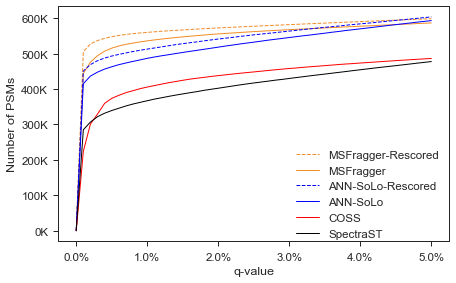

In [6]:
# Plotting config.
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=1.3)

width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

ax.plot(x, msfragger_std_table_rescored,'--', label = "MSFragger-Rescored", color='#F28C28', linewidth=1)
ax.plot(x, msfragger_std_table,'-', label = "MSFragger", color='#F28C28', linewidth=1)
ax.plot(x, ann_svm_std_table,'--', label = "ANN-SoLo-Rescored", color='b', linewidth=1)
ax.plot(x, ann_cosine_std_table,'-', label = "ANN-SoLo", color='b', linewidth=1)
ax.plot(x, coss_without_rescoring,'-', label = "COSS", color='r', linewidth=1)
ax.plot(x, spectrast_table,'-', label = "SpectraST", color='k', linewidth=1)

ax.set_xlabel('q-value')
ax.set_ylabel('Number of PSMs')
ax.legend(title_fontsize=10,loc='center right', bbox_to_anchor=(1, 0.2),fancybox=True, ncol=1)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
ax.set_yticks(np.arange(0, max(ann_svm_std_table)+1, 100000))
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)

plt.show()
#plt.savefig('std_q-value.pdf', dpi=400, bbox_inches='tight')


#### Open search benchmark

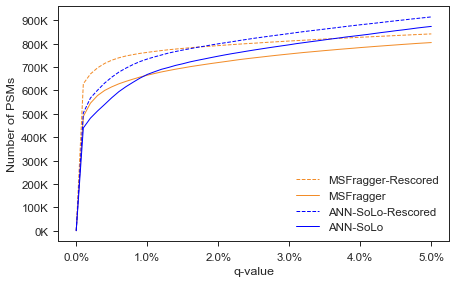

In [7]:
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

ax.plot(x, msfragger_open_table_rescored,'--', label = "MSFragger-Rescored", color='#F28C28', linewidth=1)
ax.plot(x, msfragger_open_table,'-', label = "MSFragger", color='#F28C28', linewidth=1)
ax.plot(x, ann_svm_open_table,'--', label = "ANN-SoLo-Rescored", color='b', linewidth=1)
ax.plot(x, ann_cosine_open_table, label = "ANN-SoLo", color='b', linewidth=1)

ax.set_xlabel('q-value')
ax.set_ylabel('Number of PSMs')
ax.legend(title_fontsize=30,loc='center right', bbox_to_anchor=(1, 0.16),fancybox=True, ncol=1)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
ax.set_yticks(np.arange(0, max(ann_svm_open_table)+1, 100000))
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)

plt.show()
#plt.savefig('open_q-value.pdf', dpi=400, bbox_inches='tight')

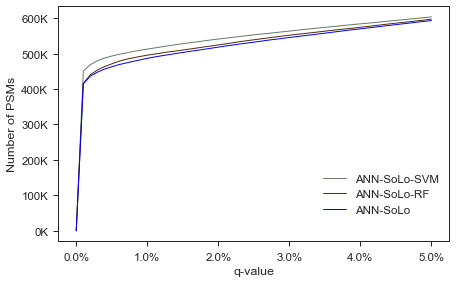

In [8]:

width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

ax.plot(x, ann_svm_std_table,'-', label = "ANN-SoLo-SVM", color='#647E68', linewidth=1)
ax.plot(x, ann_rf_std_table,'-', label = "ANN-SoLo-RF", color='#562B08', linewidth=1)
ax.plot(x, ann_cosine_std_table,'-', label = "ANN-SoLo", color='b', linewidth=1)

ax.set_xlabel('q-value')
ax.set_ylabel('Number of PSMs')
ax.legend(title_fontsize=10,loc='center right', bbox_to_anchor=(1, 0.2),fancybox=True, ncol=1)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
ax.set_yticks(np.arange(0, max(ann_svm_std_table)+1000, 100000))
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)

plt.show()
#plt.savefig('ANN-SoLo_q-value_standard_search.pdf', dpi=400, bbox_inches='tight')

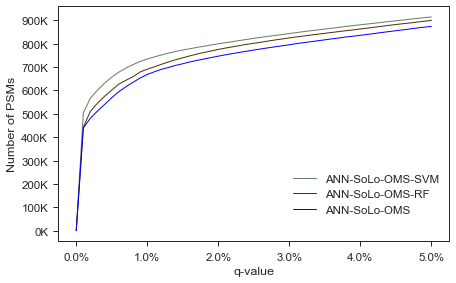

In [9]:
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

ax.plot(x, ann_svm_open_table,'-', label = "ANN-SoLo-OMS-SVM", color='#647E68', linewidth=1)
ax.plot(x, ann_rf_open_table,'-', label = "ANN-SoLo-OMS-RF", color='#562B08', linewidth=1)
ax.plot(x, ann_cosine_open_table,'-', label = "ANN-SoLo-OMS", color='b', linewidth=1)

ax.set_xlabel('q-value')
ax.set_ylabel('Number of PSMs')
ax.legend(title_fontsize=10,loc='center right', bbox_to_anchor=(1, 0.2),fancybox=True, ncol=1)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
ax.set_yticks(np.arange(0, max(ann_svm_open_table)+1000, 100000))
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)
plt.show()
#plt.savefig('ANN-SoLo_q-value_open_search.pdf', dpi=400, bbox_inches='tight')

### Percent of identifications in the whole HEK293 set

In [10]:
allSpectraCount = 1121149
spectrast_std_percent_identification = round((spectrast_table[10]/allSpectraCount)*100, 1)
coss_percent_identification = round((coss_without_rescoring[10]/allSpectraCount)*100, 1)
annsolo_std_percent_identification = round((ann_cosine_std_table[10]/allSpectraCount)*100, 1)
annsolo_std_rescored_percent_identification = round((ann_svm_std_table[10]/allSpectraCount)*100, 1)
msfragger_std_percent_identification = round((msfragger_std_table[10]/allSpectraCount)*100, 1)
msfragger_std_rescored_percent_identification = round((msfragger_std_table_rescored[10]/allSpectraCount)*100, 1)

In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+1, str(y[i])+'%', ha = 'center')

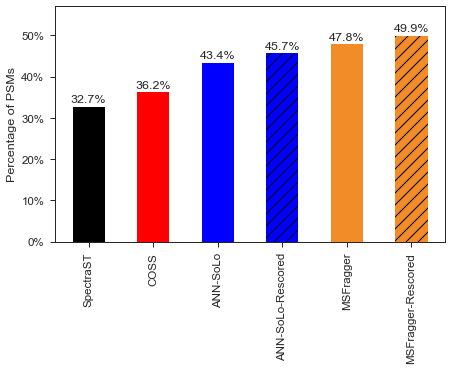

In [12]:
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

#plt.figure(figsize=(40, 25))
#plt.rcParams.update({'font.size': 30})
#ax = plt.axes()

methods = ['SpectraST','COSS','ANN-SoLo','ANN-SoLo-Rescored','MSFragger','MSFragger-Rescored']
values = (spectrast_std_percent_identification,coss_percent_identification, annsolo_std_percent_identification,annsolo_std_rescored_percent_identification, msfragger_std_percent_identification, msfragger_std_rescored_percent_identification )
index = np.arange(len(methods))
bar_width = 0.5
#ax.set_xlabel('Method')
ax.set_ylabel('Percentage of PSMs')
ax.bar(index, values, bar_width, color=('k', 'r','b', 'b','#F28C28', '#F28C28'),hatch=[ "" ,"" ,"" , "//" , "" , "//" ])
addlabels(index, values)
plt.xticks(index, methods) # labels get centered
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None, symbol='%', is_latex=False))
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylim([0, 57])

plt.show()
#plt.savefig('std_identified_PSMs_From_HEK.png')
#plt.savefig('std_identified_PSMs_From_HEK.pdf', dpi=400, bbox_inches='tight')

In [13]:
msfragger_open_percent_identification = round((msfragger_open_table[10]/allSpectraCount)*100, 1)
annsolo_open_percent_identification = round((ann_cosine_open_table[10]/allSpectraCount)*100, 1)
annsolo_open_rescored_percent_identification = round((ann_svm_open_table[10]/allSpectraCount)*100, 1)
msfragger_open__rescored_percent_identification = round((msfragger_open_table_rescored[10]/allSpectraCount)*100, 1)

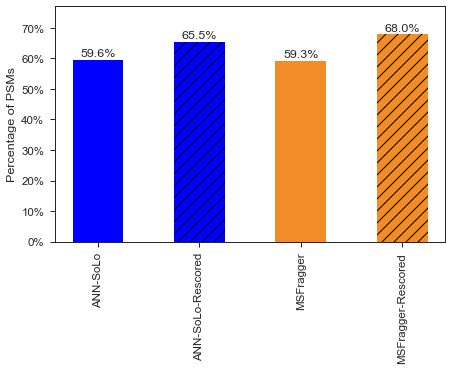

In [14]:
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

methods = ['ANN-SoLo','ANN-SoLo-Rescored','MSFragger','MSFragger-Rescored']
values = (annsolo_open_percent_identification,annsolo_open_rescored_percent_identification,msfragger_open_percent_identification, 
          msfragger_open__rescored_percent_identification)
index = np.arange(len(methods))
bar_width = 0.5
#ax.set_xlabel('Method')
ax.set_ylabel('Percentage of PSMs')
ax.bar(index, values, bar_width, color=('b', 'b','#F28C28', '#F28C28'),hatch=[ "" , "//" , "" , "//" ])
addlabels(index, values)
ax.xaxis.set_tick_params(rotation=-50)
plt.xticks(index, methods) # labels get centered
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=None, symbol='%', is_latex=False))
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylim([0, 77])

plt.show()
#plt.savefig('open_identified_PSMs_From_HEK.png')
#plt.savefig('open_identified_PSMs_From_HEK.pdf', dpi=400, bbox_inches='tight')

#### Change of identified spectra by ANN-SoLo at 1%

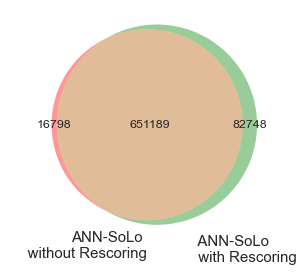

In [15]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=1.3)

height = 7
width = height / 1.618
fig, ax = plt.subplots(figsize=(width, height))

#plt.figure(figsize=(7, 7))
venn2([set(ann_mztab[ann_mztab['search_engine_score[2]'] <= 0.01]['PSM_ID']), set(ann_svm_mztab[ann_svm_mztab['search_engine_score[2]'] <= 0.01]['PSM_ID'])], set_labels = ('ANN-SoLo \n     without Rescoring','          ANN-SoLo \n          with Rescoring'))
#for text in out.set_labels:
#    text.set_fontsize(14)
plt.show()
#plt.savefig('open_psm_gain.pdf', dpi=300, bbox_inches='tight') 

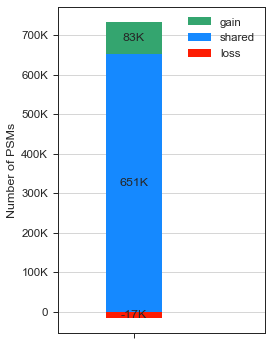

In [16]:
## Open
height = 6
width = height / 1.618
fig, ax = plt.subplots(figsize=(width, height))

df = pd.DataFrame({
                  'loss': [-16798],  
                  'shared': [651189],
                  'gain': [82748]}, index=['']) 
ylabels = ['0','0','100K','200K','300K','400K','500K','600K','700K']
ax.set_yticklabels(ylabels)
df.plot.bar( stacked=True, color=['#FD1C03', '#1589FF','#34A56F'], ax=ax, width = 0.03) 
plt.xlabel('') 
plt.ylabel('Number of PSMs') 
plt.xticks(rotation=35) 
plt.yticks(rotation=0) 
ax.grid(axis='y')
for c in ax.containers:
    labels = ['{:,.0f}'.format(int(v.get_height())/1000) + 'K' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
# specify order
order = [2, 1, 0]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])

# reduce space along x-axis
plt.xlim([- 0.04,  0.07])
plt.show() 

#plt.savefig('open_gain.pdf', dpi=400, bbox_inches='tight')

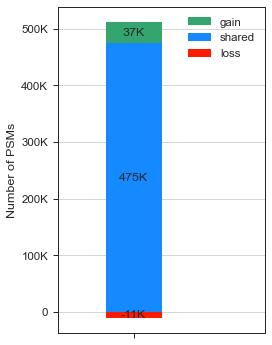

In [17]:
## Standard
height = 6
width = height / 1.618
fig, ax = plt.subplots(figsize=(width, height))

df = pd.DataFrame({
                  'loss': [-11269], 
                  'shared': [475414],
                  'gain': [37343]}, index=['']) 

ylabels = ['0','0','100K','200K','300K','400K','500K']
ax.set_yticklabels(ylabels)
df.plot.bar( stacked=True, color=['#FD1C03', '#1589FF','#34A56F'], ax=ax, width = 0.03) 
plt.xlabel('') 
plt.ylabel('Number of PSMs')
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
ax.grid(axis='y')
for c in ax.containers:
    labels = ['{:,.0f}'.format(int(v.get_height())/1000) + 'K' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

# reordering the labels
handles, labels = plt.gca().get_legend_handles_labels()
# specify order
order = [2, 1, 0]
# pass handle & labels lists along with order as below
plt.legend([handles[i] for i in order], [labels[i] for i in order])

# reduce space along x-axis
plt.xlim([- 0.04,  0.07])

plt.show() 
#plt.savefig('std_gain.pdf', dpi=400, bbox_inches='tight')

### Feature importances

In [18]:
ann_svm_std_features = pd.read_csv('ann_svm_std_features.csv')
ann_svm_open_features = pd.read_csv('ann_svm_open_features.csv')

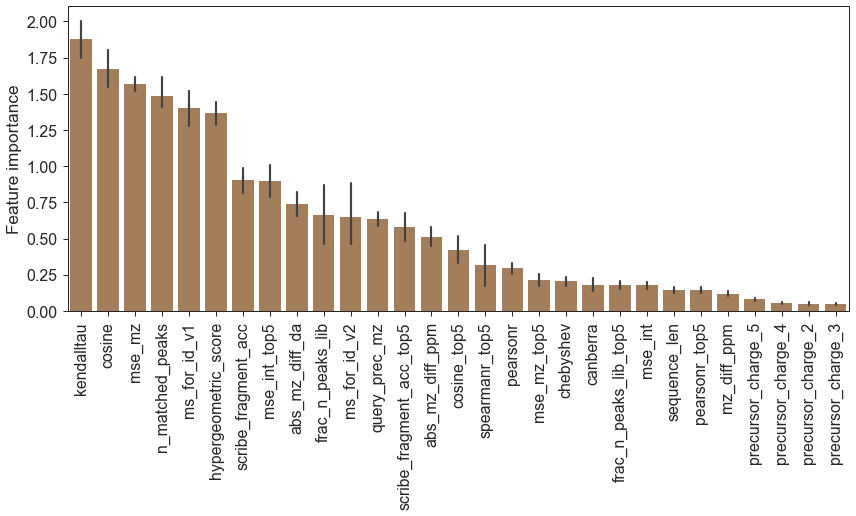

In [19]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=1.8) 
plt.figure(figsize=(14, 14/2.5))
plt.rcParams.update({'font.size': 15})
ax = plt.axes()

order = ann_svm_std_features.abs().mean(axis="rows").sort_values(ascending=False).index
sns.barplot(x="variable", y="value", data=ann_svm_std_features.abs().melt(), order=order, ax=ax, color='#B07C4F')
ax.set_xlabel("")
ax.set_ylabel("Feature importance")
ax.xaxis.set_tick_params(rotation=90)

#plt.savefig('std_feature_importance.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

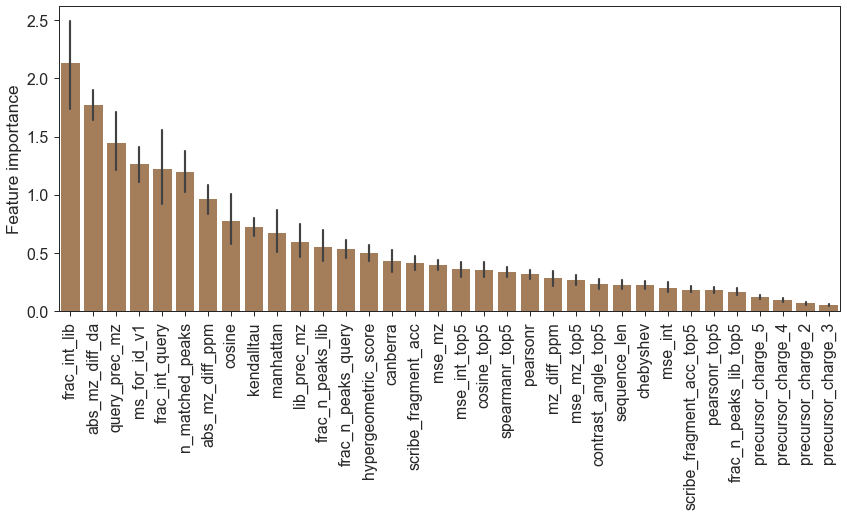

In [20]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=1.8)   
plt.figure(figsize=(14, 14/2.5))
plt.rcParams.update({'font.size': 15})
ax = plt.axes()

order = ann_svm_open_features.abs().mean(axis="rows").sort_values(ascending=False).index
sns.barplot(x="variable", y="value", data=ann_svm_open_features.abs().melt(), order=order, ax=ax, color='#B07C4F')
ax.set_xlabel("")
ax.set_ylabel("Feature importance")
ax.xaxis.set_tick_params(rotation=90)


#plt.savefig('open_feature_importance.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

### Pearson correlation matrix

In [21]:
ann_svm_std_allFeatures = pd.read_csv('ann_svm_std_allFeatures.csv')
ann_svm_open_allFeatures = pd.read_csv('ann_svm_open_allFeatures.csv')

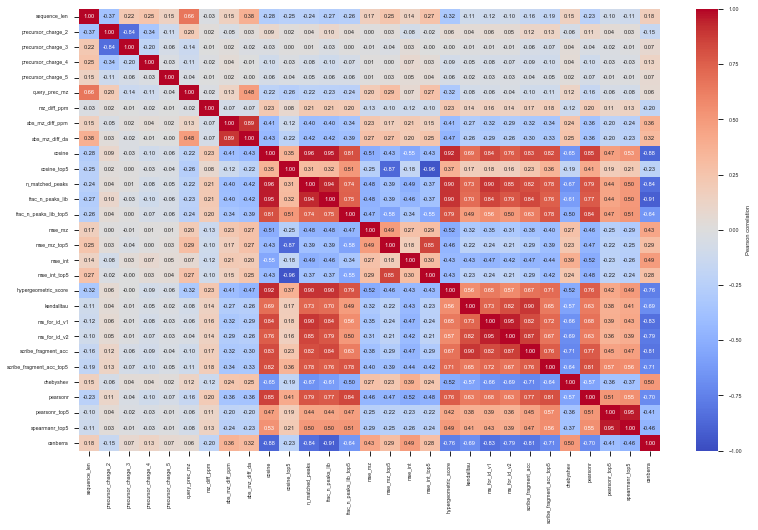

In [22]:
## Standard search selected features
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=0.6)
width = 13
height = width / 1.6
plt.figure(figsize=(width, height))
ax = plt.axes()

sns.heatmap(ann_svm_std_allFeatures.corr(method='pearson'), annot = True, fmt='.2f',cmap= 'coolwarm', ax=ax, vmin=-1, vmax=1, cbar_kws={'label': 'Pearson correlation'})
ax.yaxis.set_tick_params(rotation=0)
ax.xaxis.set_tick_params(rotation=90)
plt.show()
#plt.savefig('correlation_of_all_features_std.pdf', dpi=300, bbox_inches='tight')

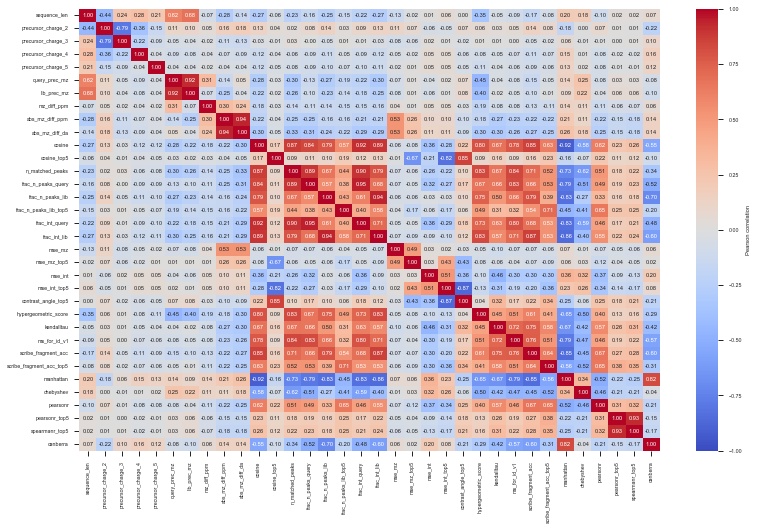

In [23]:
## Open search selected features
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=0.6)
width = 13
height = width / 1.6
plt.figure(figsize=(width, height))
ax = plt.axes()

sns.heatmap(ann_svm_open_allFeatures.corr(method='pearson'), annot = True, fmt='.2f',cmap= 'coolwarm', ax=ax, vmin=-1, vmax=1, cbar_kws={'label': 'Pearson correlation'})
ax.yaxis.set_tick_params(rotation=0)
ax.xaxis.set_tick_params(rotation=90)
plt.show()
#plt.savefig('correlation_of_all_features_open.pdf', dpi=300, bbox_inches='tight')

### Q-value distributions for PSMs gained and lost during PSM rescoring, compared to the retained PSMs

#### Standard search

In [24]:
## Data integration and preparation
# Clean
ann_svm_std_master_table = ann_svm_std_master_table[['File','index','mokapot q-value']].dropna()
ann_cosine_std_master_table = ann_cosine_std_master_table[['File','index','mokapot q-value']].dropna()
ann_cosine_std_master_table['index'] = ann_cosine_std_master_table['index'].astype('int')
ann_svm_std_master_table['index'] = ann_svm_std_master_table['index'].astype('int')
ann_cosine_std_master_table['File'] = ann_cosine_std_master_table['File'].apply(lambda x: str(x.strip()))
ann_svm_std_master_table['File'] = ann_svm_std_master_table['File'].apply(lambda x: str(x.strip()))
# Filter
std_without_rescoring = ann_cosine_std_master_table[ann_cosine_std_master_table['mokapot q-value'] <= 0.01].copy()
std_with_rescoring = ann_svm_std_master_table[ann_svm_std_master_table['mokapot q-value'] <= 0.01].copy()
# Create Unique Ids
std_without_rescoring["UniqueId"] = std_without_rescoring['index'].astype(str) +"-"+ std_without_rescoring["File"]
std_with_rescoring["UniqueId"] = std_with_rescoring['index'].astype(str) +"-"+ std_with_rescoring["File"]
# Slice
shared = std_without_rescoring.loc[std_without_rescoring['UniqueId'].isin(set(std_with_rescoring['UniqueId']))]
gained = std_with_rescoring.loc[~std_with_rescoring['UniqueId'].isin(set(std_without_rescoring['UniqueId']))]
lost = std_without_rescoring.loc[~std_without_rescoring['UniqueId'].isin(set(std_with_rescoring['UniqueId']))]
# Constract final table
## Set a single dataframe with all values
gained['set'] = ['gained']*len(gained)
lost['set'] = ['lost']*len(lost)
shared['set'] = ['shared']*len(shared)
before_rescoring = pd.concat([lost,shared])
after_rescoring = pd.concat([gained,shared])

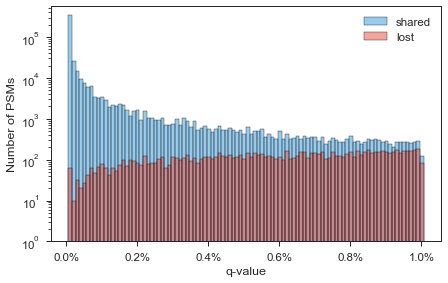

In [25]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=1.3)    # Single-column figure.
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

g = sns.histplot(before_rescoring.reset_index(), x="mokapot q-value", hue="set", palette=["#e74c3c", "#3498db"],fill=True, binwidth=0.0001)
g.set(yscale="log")
ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()))
ax.set(xlabel='q-value', ylabel='Number of PSMs')
plt.legend(title='', labels=['shared', 'lost'])
plt.yticks([1, 10, 100, 1000, 10000, 100000])
plt.show()
#plt.savefig('ANN-SoLo_STD_LostvsShared.pdf', dpi=400, bbox_inches='tight')

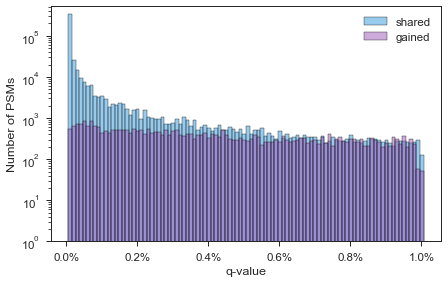

In [26]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=1.3)
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

g = sns.histplot(after_rescoring.reset_index(), x="mokapot q-value", hue="set", palette=["#9b59b6", "#3498db"],fill=True, binwidth=0.0001)
g.set(yscale="log")
ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()))
ax.set(xlabel='q-value', ylabel='Number of PSMs')
plt.legend(title='', labels=['shared', 'gained'])
plt.yticks([1, 10, 100, 1000, 10000, 100000])
plt.show()
#plt.savefig('ANN-SoLo_STD_GainedvsShared.pdf', dpi=400, bbox_inches='tight')

#### Open search

In [27]:
# Slice
lost = ann_mztab[ann_mztab['search_engine_score[2]'] <= 0.01].loc[~ann_mztab[ann_mztab['search_engine_score[2]'] <= 0.01]['PSM_ID'].isin(set(ann_svm_mztab[ann_svm_mztab['search_engine_score[2]'] <= 0.01]['PSM_ID']))]
gained = ann_svm_mztab[ann_svm_mztab['search_engine_score[2]'] <= 0.01].loc[~ann_svm_mztab[ann_svm_mztab['search_engine_score[2]'] <= 0.01]['PSM_ID'].isin(set(ann_mztab[ann_mztab['search_engine_score[2]'] <= 0.01]['PSM_ID']))]
shared = ann_svm_mztab[ann_svm_mztab['search_engine_score[2]'] <= 0.01].loc[ann_svm_mztab[ann_svm_mztab['search_engine_score[2]'] <= 0.01]['PSM_ID'].isin(set(ann_mztab[ann_mztab['search_engine_score[2]'] <= 0.01]['PSM_ID']))]
# Integrate
lost['set'] = ['lost']*len(lost)
shared['set'] = ['shared']*len(shared)
lost['FDR'] = list(lost['search_engine_score[2]'])
shared['FDR'] = list(shared['search_engine_score[2]'])
before_rescoring = pd.concat([lost,shared])
# Integrate
gained['set'] = ['lost']*len(gained)
shared['set'] = ['shared']*len(shared)
gained['FDR'] = list(gained['search_engine_score[2]'])
shared['FDR'] = list(shared['search_engine_score[2]'])
after_rescoring = pd.concat([gained,shared])

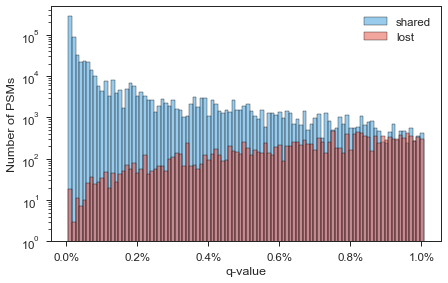

In [28]:
## Before rescoring
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=1.3)    # Single-column figure.

# Actual plotting.
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

g = sns.histplot(before_rescoring, x="FDR", hue="set", palette=["#e74c3c", "#3498db"],fill=True, binwidth=0.0001)
g.set(yscale="log")
ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()))
ax.set(xlabel='q-value', ylabel='Number of PSMs')
plt.legend(title='', labels=['shared', 'lost'])
plt.yticks([1, 10, 100, 1000, 10000, 100000])
plt.show()
#plt.savefig('ANN-SoLo_OMS_LostvsShared.pdf', dpi=400, bbox_inches='tight')

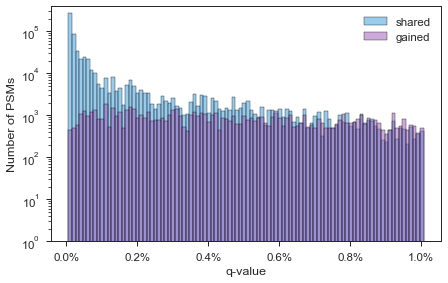

In [29]:
# Plotting config.
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=1.3)    # Single-column figure.

# Actual plotting.
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

g = sns.histplot(after_rescoring, x="FDR", hue="set", palette=["#9b59b6", "#3498db"],fill=True, binwidth=0.0001)
g.set(yscale="log")
ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()))
ax.set(xlabel='q-value', ylabel='Number of PSMs')
plt.legend(title='', labels=['shared', 'gained'])
plt.yticks([1, 10, 100, 1000, 10000, 100000])
plt.show()
#plt.savefig('ANN-SoLo_OMS_GainedvsShared.pdf', dpi=400, bbox_inches='tight')

### Histogram of non-zero precursor mass differences from PSMs at 1% FDR obtained from open searching

#### For lost

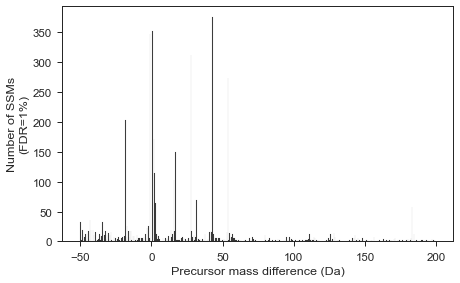

In [30]:
## Prepare dataframe
lost['mz_diff_da'] = (lost['exp_mass_to_charge'] - lost['calc_mass_to_charge']) * lost['charge']

## Plot
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=1.3)    # Single-column figure.
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

g = sns.histplot(pd.concat([lost[lost['mz_diff_da'].between(-50, -0.51)],lost[lost['mz_diff_da'].between(0.51, 200)]]), x="mz_diff_da", color='black',fill=True, binwidth=0.4)
ax.set(xlabel='Precursor mass difference (Da)', ylabel='Number of SSMs\n(FDR=1%)')
plt.show()
#plt.savefig('ANN-SoLo_OMS_lost_precursor_mass_difference_-50_200Da.pdf', dpi=400, bbox_inches='tight')

#### For shared

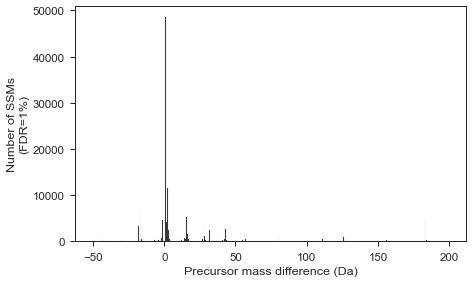

In [31]:
## Prepare dataframe
shared['mz_diff_da'] = (shared['exp_mass_to_charge'] - shared['calc_mass_to_charge']) * shared['charge']

## Plot
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

g = sns.histplot(pd.concat([shared[shared['mz_diff_da'].between(-50, -0.51)],shared[shared['mz_diff_da'].between(0.51, 200)]]), x="mz_diff_da", color='black',fill=True, binwidth=0.4)
ax.set(xlabel='Precursor mass difference (Da)', ylabel='Number of SSMs\n(FDR=1%)')
plt.show()
#plt.savefig('ANN-SoLo_OMS_shared_precursor_mass_difference_-50_200Da.pdf', dpi=400, bbox_inches='tight')


#### For gained

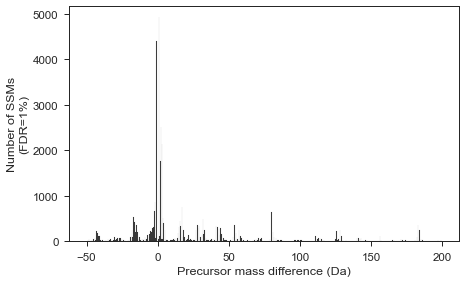

In [32]:
### Prepare dataframe
gained['mz_diff_da'] = (gained['exp_mass_to_charge'] - gained['calc_mass_to_charge']) * gained['charge']

# Plot
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_context('paper', font_scale=1.3)
width = 7
height = width / 1.618
fig, ax = plt.subplots(figsize=(width, height))

g = sns.histplot(pd.concat([gained[gained['mz_diff_da'].between(-50, -0.51)],gained[gained['mz_diff_da'].between(0.51, 200)]]), x="mz_diff_da", color='black',fill=True, binwidth=0.4)
ax.set(xlabel='Precursor mass difference (Da)', ylabel='Number of SSMs\n(FDR=1%)')
plt.show()
#plt.savefig('ANN-SoLo_OMS_gained_precursor_mass_difference_-50_200Da.pdf', dpi=400, bbox_inches='tight')
